In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv') 

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Atributo alvo é a coluna Outcome
y = data["Outcome"]

# Convertendo atributo categórico em numérico
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

# Nova seção

In [ ]:
# X são os atributos descritivos - excluir a classe (Outcome) que é a ultima columa
X = data.iloc[:, 0:len(data.columns)-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# visualizando o conjunto de treinamento como data frame
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,-0.844885,-0.810425,-0.470732,-0.159107,-0.189283,-1.027104,-0.639892,-0.956462
1,0.342981,-0.497453,0.149641,0.530902,2.129051,0.622846,-0.944924,-0.445935
2,-1.141852,0.441461,-0.057150,1.346366,1.477833,1.308210,-0.322779,-0.786286
3,0.046014,0.316272,-0.057150,0.029077,0.748470,0.140553,-0.941903,-0.445935
4,-0.844885,-0.560048,-2.021665,1.095454,0.027790,1.435129,-0.872441,-0.020496


In [ ]:
# visualizando o conjunto de teste como data frame
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7
0,0.639947,-0.716533,-0.574128,0.781814,0.956860,0.254780,-0.126471,0.830381
1,-0.547919,-0.278373,0.304734,0.719086,-0.692891,0.470543,-0.978145,-1.041549
2,-0.547919,-0.403562,-0.263941,-1.288212,-0.692891,-0.151361,-0.947944,-1.041549
3,1.233880,-0.434859,0.563223,-1.288212,-0.692891,-0.938260,1.160099,0.064591
4,0.936914,0.472758,1.080200,-1.288212,-0.692891,-0.265588,-0.790898,1.425995


In [ ]:
# visualizando os rotulos do conjunto de treinamento como data frame
pd.DataFrame(y_train).head()

,0
0,0
1,0
2,1
3,0
4,0


In [ ]:
# visualizando os rotulos do conjunto de treinamento como data frame
pd.DataFrame(y_test).head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Criando o MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), activation='relu', solver='adam', alpha=0.001, max_iter=1000)

mlp = MLPClassifier(hidden_layer_sizes=(3), solver='adam', alpha=0.009, max_iter=1000)
print(mlp)

MLPClassifier(alpha=0.009, hidden_layer_sizes=3, max_iter=1000)


In [ ]:
# Treinando o modelo
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.009, hidden_layer_sizes=3, max_iter=1000)

In [ ]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
print(confusion_matrix(y_test, predict_test,))
print(classification_report(y_test, predict_test))


[[304  45]
 [ 64 124]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       349
           1       0.73      0.66      0.69       188

    accuracy                           0.80       537
   macro avg       0.78      0.77      0.77       537
weighted avg       0.79      0.80      0.79       537

[[121  30]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# Avaliando o modelo
print("Acurácia:", mlp.score(X_test, y_test))


Acurácia: 0.7359307359307359


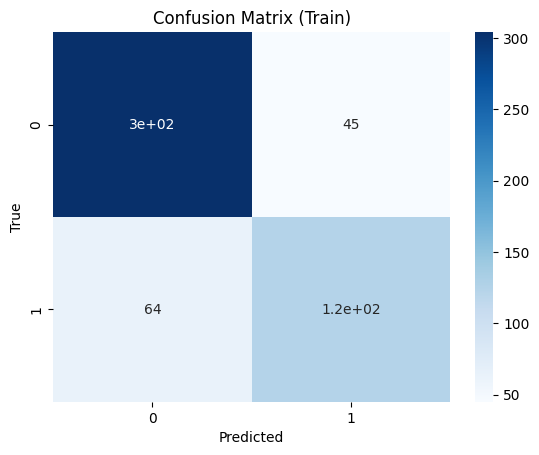

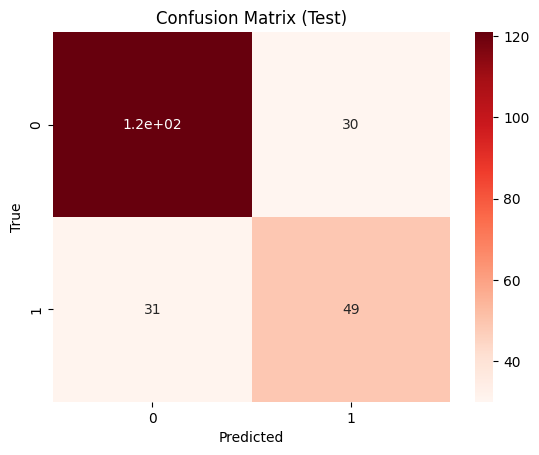

In [ ]:
# Heatmap da matriz de confusão para os dados de treinamento
import matplotlib.pyplot as plt
cm_train = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm_train, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train)')

# Heatmap da matriz de confusão para os dados de teste
cm_test = confusion_matrix(y_test, predict_test)
plt.figure()
sns.heatmap(cm_test, annot=True, cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')

plt.show()